# Additional Analysis on Wine Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [2]:
wine_one = pd.read_csv('winemag-data-130k-v2.csv')
wine_two = pd.read_csv('winemag-data_first150k.csv')

In [3]:
wine_one.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wine_two.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
copy_wine_one = wine_one.copy()
copy_wine_two = wine_two.copy()

In [6]:
copy_wine_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [7]:
copy_wine_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [8]:
#checking for null values.
print(pd.DataFrame(copy_wine_one.isnull().sum(), columns = ['wine_one']))
print(pd.DataFrame(copy_wine_two.isnull().sum(), columns = ['wine_two']))

                       wine_one
Unnamed: 0                    0
country                      63
description                   0
designation               37465
points                        0
price                      8996
province                     63
region_1                  21247
region_2                  79460
taster_name               26244
taster_twitter_handle     31213
title                         0
variety                       1
winery                        0
             wine_two
Unnamed: 0          0
country             5
description         0
designation     45735
points              0
price           13695
province            5
region_1        25060
region_2        89977
variety             0
winery              0


In [9]:
copy_wine_one.drop(['Unnamed: 0','region_1','region_2','taster_name','taster_twitter_handle','designation','title'], axis = 1, inplace = True)
copy_wine_two.drop(['Unnamed: 0','designation','region_1','region_2'], axis = 1, inplace = True)

In [10]:
#Merging both data frames.
combined_wine_data = pd.concat([copy_wine_one,copy_wine_two], axis = 0, ignore_index = True, sort = True)

In [52]:
 combined_wine_data.isnull().sum()

country           68
description        0
points             0
price          22691
province          68
variety            1
winery             0
dtype: int64

In [12]:
US = combined_wine_data[combined_wine_data['country'] == 'US']
France = combined_wine_data[combined_wine_data['country'] == 'France']
Italy = combined_wine_data[combined_wine_data['country'] == 'Italy']


null_values = []
countries = [US,France,Italy]

for country in countries:
    null = country['price'].isnull().sum()
    rows = country.shape[0]
    percentage_of_nulls = null / rows
    null_values.append(percentage_of_nulls)

null_values_dict = {}
keys = ['US','France','Italy']
i = 0
for key in keys:
    null_values_dict[key] = null_values[i]*100
    i += 1
 
table_of_nulls = pd.DataFrame(null_values_dict.items(), columns = ['Country','Percentage of Null Values'])
table_of_nulls

,Country,Percentage of Null Values
0,US,0.425146
1,France,24.611609
2,Italy,17.016133


In [13]:
US = US.dropna(subset = ['price'], axis = 0)

In [14]:
France['price'] = France['price'].fillna(France['price'].mean())
Italy['price'] = Italy['price'].fillna(Italy['price'].mean())

# US Dataset

In [15]:
words = " ".join(US['description'])

In [16]:
tokenized_word = word_tokenize(words)

In [17]:
# Stripping any whitespace in words as well as lower casing all words to prevent misidentification.
# Getting rid of stopwords.
stop_words = set(stopwords.words('english'))


word_strip_of_whitespace = []
for word in tokenized_word:
    no_whitespace_word = word.replace(" ","")
    no_whitespace_word = word.lower()
    word_strip_of_whitespace.append(no_whitespace_word)

    
filtered_words = []    
for word in word_strip_of_whitespace:
    if word not in stop_words:
        filtered_words.append(word)


        


In [18]:
filter_words_no_punc = [word for word in filtered_words if word not in string.punctuation]

In [26]:
df = pd.DataFrame(filter_words_no_punc, columns = ['words'])

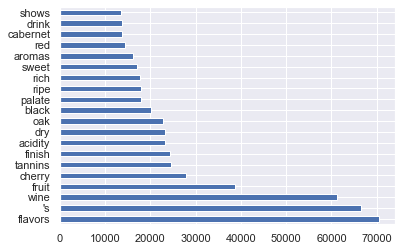

In [38]:
 df['words'].value_counts()[:20].plot(kind= 'barh')
plt.show()

In [54]:
# Re-usable code

words = " ".join(US['province'])
tokenized_word = word_tokenize(words)

stop_words = set(stopwords.words('english'))


word_strip_of_whitespace = []
for word in tokenized_word:
    no_whitespace_word = word.replace(" ","")
    no_whitespace_word = word.lower()
    word_strip_of_whitespace.append(no_whitespace_word)

    
filtered_words = []    
for word in word_strip_of_whitespace:
    if word not in stop_words:
        filtered_words.append(word)

filter_words_no_punc = [word for word in filtered_words if word not in string.punctuation]

province = pd.DataFrame(filter_words_no_punc, columns = ['words'])


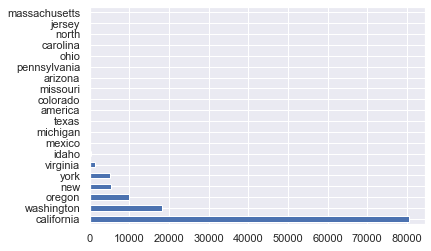

In [55]:
province['words'].value_counts()[:20].plot(kind= 'barh')
plt.show()

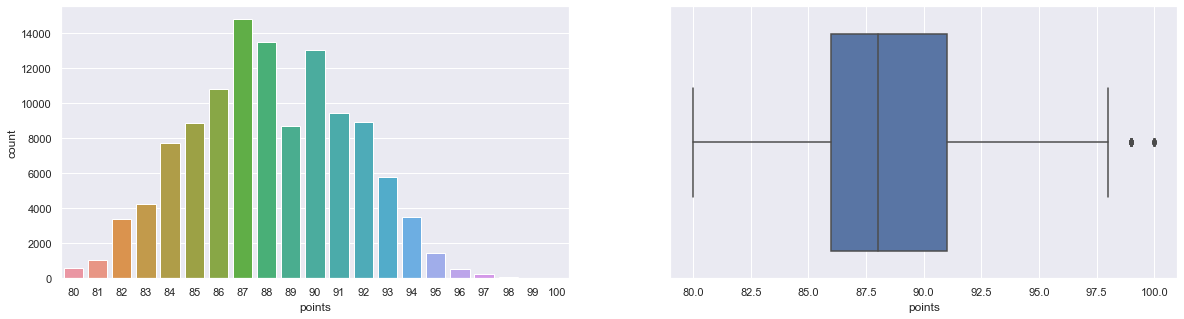

In [61]:
fi, ax = plt.subplots(1,2, figsize = (20,5))
sns.countplot(x = 'points', data = US, ax = ax[0])
sns.boxplot(x = 'points', data = US, ax = ax[1])
plt.show()

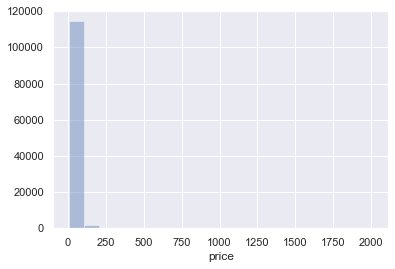

In [71]:
sns.distplot(US['price'], bins = 20, kde = False)
plt.show()

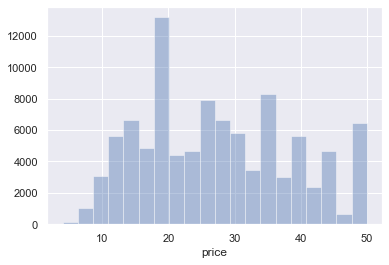

In [72]:
sns.distplot(US[US['price'] <= 50]['price'], bins = 20, kde = False)
plt.show()

# France Dataset

In [39]:
words = " ".join(France['description'])

In [40]:
tokenized_word = word_tokenize(words)

In [41]:
# Stripping any whitespace in words as well as lower casing all words to prevent misidentification.
# Getting rid of stopwords
stop_words = set(stopwords.words('english'))


word_strip_of_whitespace = []
for word in tokenized_word:
    no_whitespace_word = word.replace(" ","")
    no_whitespace_word = word.lower()
    word_strip_of_whitespace.append(no_whitespace_word)

    
filtered_words = []    
for word in word_strip_of_whitespace:
    if word not in stop_words:
        filtered_words.append(word)

In [42]:
filter_words_no_punc = [word for word in filtered_words if word not in string.punctuation]

In [43]:
df2 = pd.DataFrame(filter_words_no_punc, columns = ['words'])

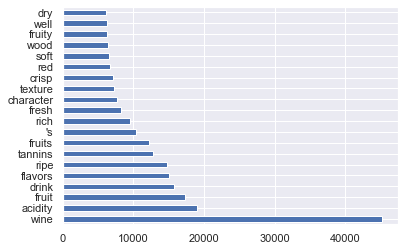

In [44]:
df2['words'].value_counts()[:20].plot(kind= 'barh')
plt.show()

In [76]:
words = " ".join(France['province'])
tokenized_word = word_tokenize(words)

stop_words = set(stopwords.words('english'))


word_strip_of_whitespace = []
for word in tokenized_word:
    no_whitespace_word = word.replace(" ","")
    no_whitespace_word = word.lower()
    word_strip_of_whitespace.append(no_whitespace_word)

    
filtered_words = []    
for word in word_strip_of_whitespace:
    if word not in stop_words:
        filtered_words.append(word)

filter_words_no_punc = [word for word in filtered_words if word not in string.punctuation]

province = pd.DataFrame(filter_words_no_punc, columns = ['words'])

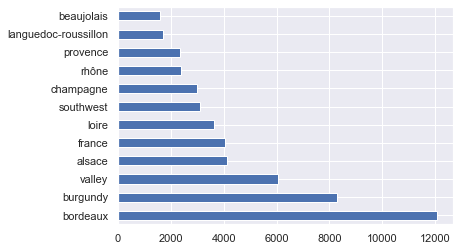

In [77]:
province['words'].value_counts()[:20].plot(kind= 'barh')
plt.show()

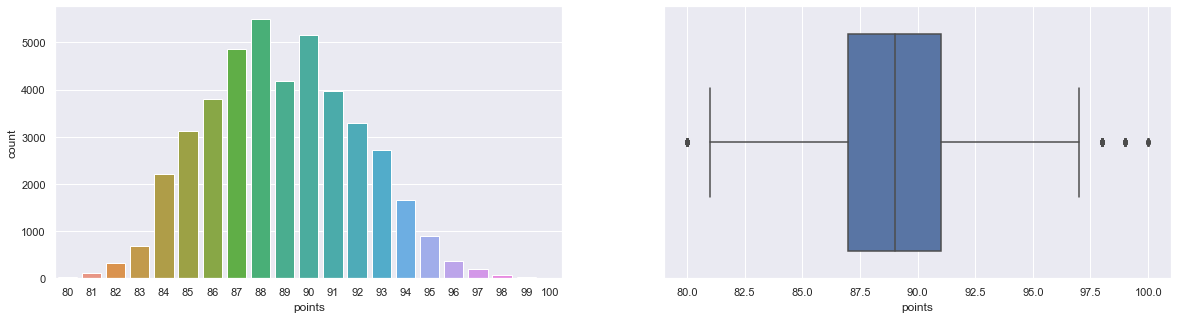

In [73]:
fi, ax = plt.subplots(1,2, figsize = (20,5))
sns.countplot(x = 'points', data = France, ax = ax[0])
sns.boxplot(x = 'points', data = France, ax = ax[1])
plt.show()

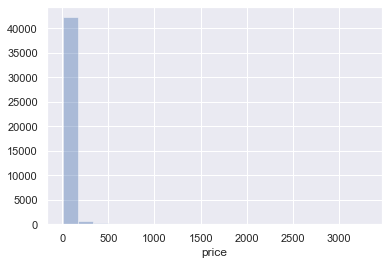

In [74]:
sns.distplot(France['price'], bins = 20, kde = False)
plt.show()

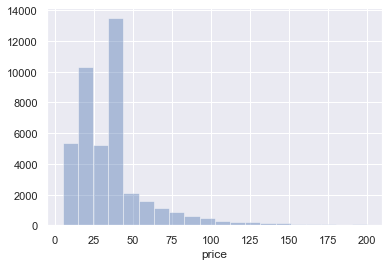

In [75]:
sns.distplot(France[France['price'] <= 200]['price'], bins = 20, kde = False)
plt.show()

# Italy Dataset

In [45]:
words = " ".join(Italy['description'])

In [46]:
tokenized_word = word_tokenize(words)

In [47]:
# Stripping any whitespace in words as well as lower casing all words to prevent misidentification.
# Getting rid of stopwords.
stop_words = set(stopwords.words('english'))


word_strip_of_whitespace = []
for word in tokenized_word:
    no_whitespace_word = word.replace(" ","")
    no_whitespace_word = word.lower()
    word_strip_of_whitespace.append(no_whitespace_word)

    
filtered_words = []    
for word in word_strip_of_whitespace:
    if word not in stop_words:
        filtered_words.append(word)

In [48]:
filter_words_no_punc = [word for word in filtered_words if word not in string.punctuation]

In [49]:
df3 = pd.DataFrame(filter_words_no_punc, columns = ['words'])

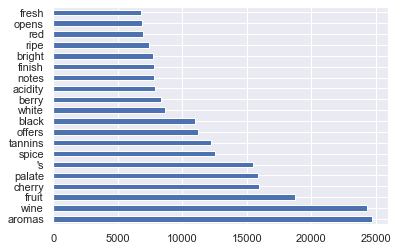

In [51]:
df3['words'].value_counts()[:20].plot(kind= 'barh')
plt.show()

In [78]:
words = " ".join(Italy['province'])
tokenized_word = word_tokenize(words)

stop_words = set(stopwords.words('english'))


word_strip_of_whitespace = []
for word in tokenized_word:
    no_whitespace_word = word.replace(" ","")
    no_whitespace_word = word.lower()
    word_strip_of_whitespace.append(no_whitespace_word)

    
filtered_words = []    
for word in word_strip_of_whitespace:
    if word not in stop_words:
        filtered_words.append(word)

filter_words_no_punc = [word for word in filtered_words if word not in string.punctuation]

province = pd.DataFrame(filter_words_no_punc, columns = ['words'])

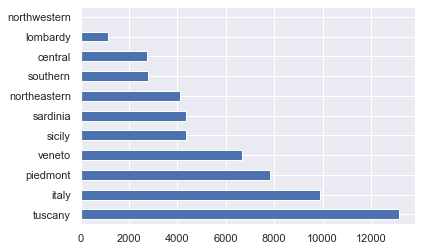

In [80]:
province['words'].value_counts()[:20].plot(kind= 'barh')
plt.show()

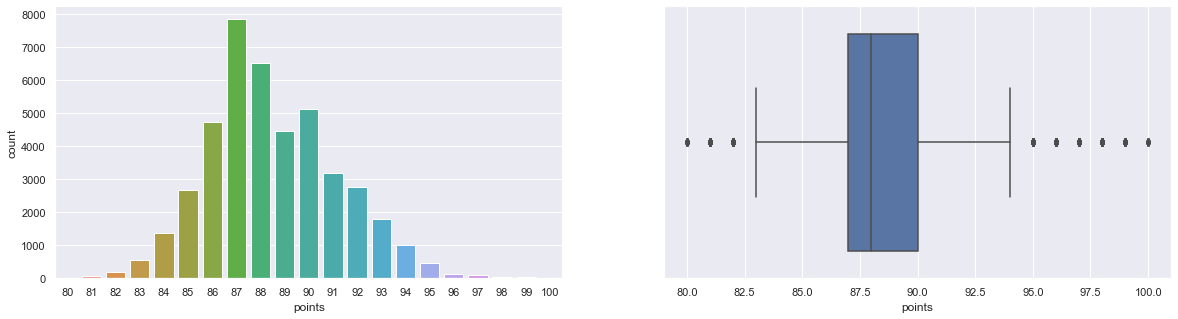

In [81]:
fi, ax = plt.subplots(1,2, figsize = (20,5))
sns.countplot(x = 'points', data = Italy, ax = ax[0])
sns.boxplot(x = 'points', data = Italy, ax = ax[1])
plt.show()

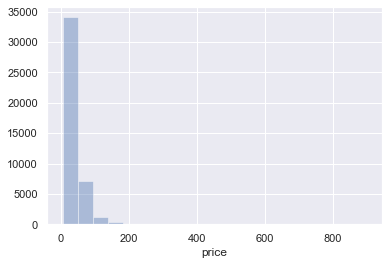

In [82]:
sns.distplot(Italy['price'], bins = 20, kde = False)
plt.show()

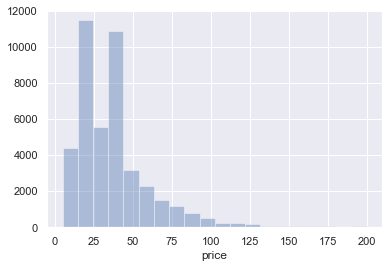

In [83]:
sns.distplot(Italy[Italy['price'] <= 200]['price'], bins = 20, kde = False)
plt.show()